In [1]:
import numpy as np

from robust_smc.data import TANSimulator, ExplosiveTANSimulator
from robust_smc.sampler import LinearDiagonalGaussianBPF

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
simulator = TANSimulator(100, observation_std=20.0, seed=42)

In [3]:
num_samples = 1000
# prior_std = np.array([1e3, 1e3, 1e3, 3.0, 1.0, 1.0])
# prior_std = simulator.process_std
prior_std = np.array([1e-1, 1e-1, 1.0, 1e-2, 1e-2, 1e-1])
transition_matrix = simulator.transition_matrix
# x_init = np.zeros((1000, 6))
x_init = np.repeat(simulator.X0[None, :], num_samples, axis=0)
noise_std = 20.0

In [4]:
sampler = LinearDiagonalGaussianBPF(simulator.Y, transition_matrix=transition_matrix, 
                                    noise_std=noise_std, prior_std=prior_std, 
                                    x_init=x_init, observation_model=simulator.observation_model,
                                    num_samples=num_samples
                                   )

In [5]:
sampler.sample()

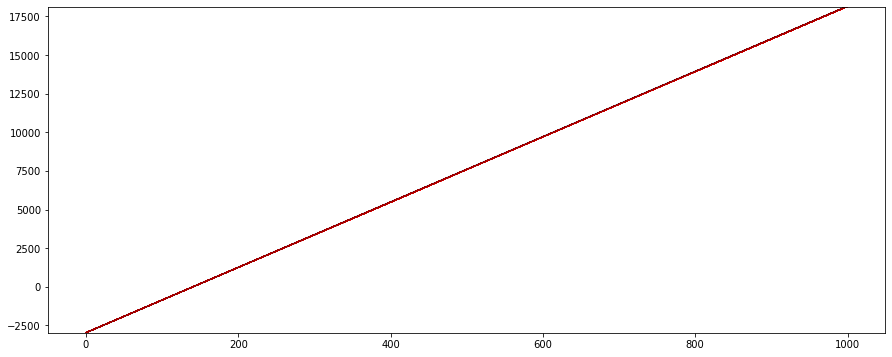

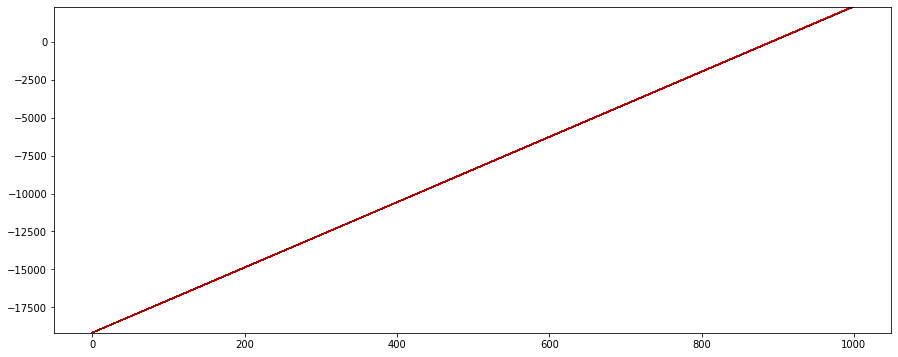

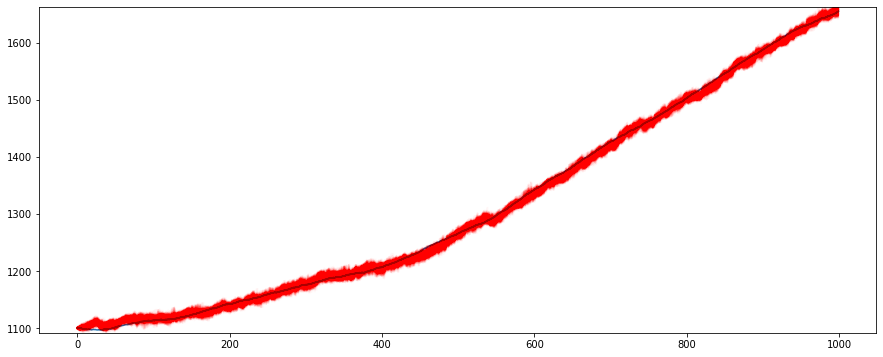

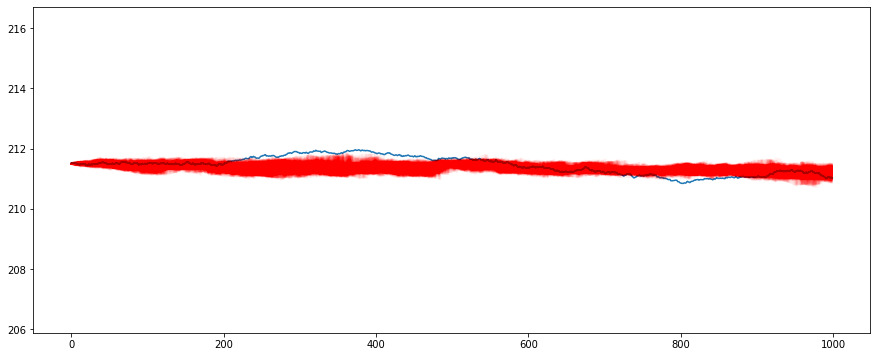

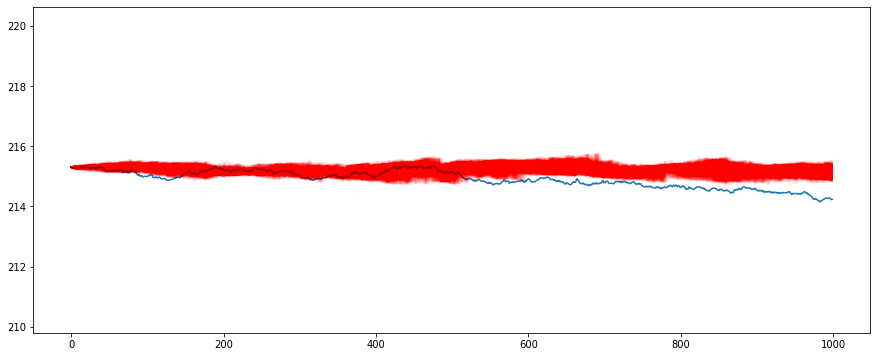

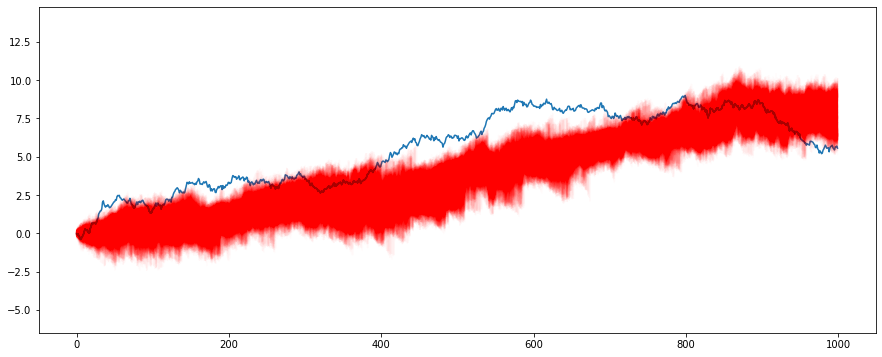

In [6]:
for var in range(6):
    plt.figure(figsize=(15, 6))
    traj = np.stack(sampler.x_trajectories)
    plt.plot(simulator.X[1:, var])
    for i in range(num_samples):
        plt.plot(traj[:, i, var], c='r', alpha=0.01, ls='-')
        lims = (np.min(traj[:, i, var]), np.max(traj[:, i, var]))
        plt.ylim(lims[0] - 5., lims[1] + 5.0)
    plt.savefig(f'./figures/bpf-trajectories_{var}.png', dp=300)

In [7]:
from scipy.special import logsumexp
def normalised_weights(logw):
    return np.exp(logw - logsumexp(logw))

In [8]:
normalised_weights(sampler.logw[-1] - logsumexp(sampler.logw[-1]))

array([[0.00098326],
       [0.0010757 ],
       [0.00108997],
       [0.00082416],
       [0.00088299],
       [0.00117519],
       [0.0011776 ],
       [0.00112384],
       [0.00073853],
       [0.00117772],
       [0.00115865],
       [0.00108052],
       [0.00065311],
       [0.00116674],
       [0.00096495],
       [0.00113426],
       [0.00074873],
       [0.00094633],
       [0.00096981],
       [0.00104966],
       [0.00088959],
       [0.00113415],
       [0.00101869],
       [0.00110088],
       [0.00102556],
       [0.00113161],
       [0.00100653],
       [0.00111713],
       [0.00070651],
       [0.00103302],
       [0.00109014],
       [0.00116659],
       [0.00095887],
       [0.00058438],
       [0.00117014],
       [0.0011338 ],
       [0.00069267],
       [0.00117207],
       [0.00054602],
       [0.0010572 ],
       [0.00100302],
       [0.0009452 ],
       [0.00112766],
       [0.00101276],
       [0.001091  ],
       [0.00110617],
       [0.00114297],
       [0.000